<a href="https://colab.research.google.com/github/DattaIn/idatta.github.io/blob/master/Movielens_NoSQLCassandra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Data querying and analysis using NoSQL Database

## Problem Statement

Using the Cassandra NoSQL database, explore the **Movielens** dataset and build a movie recommendation engine

## Learning Objectives

At the end of the mini-project, you will be able to :

* understand the concepts of NoSQL platforms
* implement the database connectivity using Cassandra
* create and insert data to the database
* perform querying, retrieving and analyzing the data from database

### Dataset

The dataset chosen for this mini-project is [Movielens Dataset](https://movielens.org/). The dataset describes movies and ratings from Movielens. It contains movies from year 1919 to 2000 of total 3883 movies. There are 6040 users who have rated one or more than one movie of total 1000209 ratings collected. Movielens is maintained by members of GroupLens Research at the University of Minnesota. There are 3 datasets given, and they are:

1. `data_movie.csv` that contains movies information:

* MovieId
* Title
* Genres

2. `data_rating.csv` that contains ratings of movies by users:

* UserId
* MovieId
* Rating

3. `data_users.csv` that contains users information:

* UserId
* Age
* Gender

## Information

#### NoSQL platforms

A NoSQL database provides a mechanism for storage and retrieval of data that is modeled in a form other than the tabular relations used in relational databases.

**Cassandra**

Apache Cassandra is a free and open-source, distributed, wide-column store, NoSQL database management system designed to handle large amounts of data across many commodity servers, providing high availability with no single point of failure. It is a NOSQL database developed by Facebook. It is a great database that allows you to effectively run queries on large amount of structured and semi structured data.

To know when you have to choose Cassandra as your database of choice, you need to have an understanding of CAP Theorem.

CAP theorem states that it is impossible for a distributed system to satisfy all three of these guarantees together, you need to leave one out.

- C is Consistency, means all nodes have the same data at the same time
- P is partition tolerance, means that in case of failure the system continues to operate
- A is availability , make sure every request receives a response

![img](https://developer.ibm.com/developer/default/tutorials/ba-set-up-apache-cassandra-architecture/images/figure1.png)

### Components of Cassandra

There are following components in the Cassandra

![img](https://www.guru99.com/images/cassandra/021116_0524_CassandraAr1.png)

**Node**
Node is the place where data is stored. It is the basic component of Cassandra.

**Data Center**
A collection of nodes are called data center. Many nodes are categorized as a data center.

**Cluster**
The cluster is the collection of many data centers.

**Commit Log**
Every write operation is written to Commit Log. Commit log is used for crash recovery.

**Mem-table**
After data written in Commit log, data is written in Mem-table. Data is written in Mem-table temporarily.

**SSTable**
When Mem-table reaches a certain threshold, data is flushed to an SSTable disk file.

### Data Replication

As hardware problem can occur or link can be down at any time during data process, a solution is required to provide a backup when the problem has occurred. So data is replicated for assuring no single point of failure.

Cassandra places replicas of data on different nodes based on these two factors.
- Where to place next replica is determined by the Replication Strategy.
- While the total number of replicas placed on different nodes is determined by the Replication Factor.

One Replication factor means that there is only a single copy of data while three replication factor means that there are three copies of the data on three different nodes.

## Grading = 10 Points

**Install the cassandra-driver**

In [ ]:
!pip install cassandra-driver

     |████████████████████████████████| 3.8MB 6.1MB/s 


#### Importing Necessary Packages

In [ ]:
import pandas as pd
import cassandra
from cassandra.cluster import Cluster
from cassandra.auth import PlainTextAuthProvider
from matplotlib import pyplot as plt

In [ ]:
print(cassandra.__version__)

3.25.0


### Database connection (2 points)

**Astra Datastax login:** Login to [Datastax](https://www.datastax.com/) and create a database

For detailed instructions of account creation, please refer this [document](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/DataStax_Connect.pdf)

**Connect the database and create keyspace:**

* Download Secure Connect Bundle zip file from Datastax [connect](https://docs.datastax.com/en/astra/docs/obtaining-database-credentials.html) section. Follow the instructions on the page
* Upload the `Secure-connect-XXXX.zip` file, which is downloaded from datastax.
* Generate the token and save the credentials from settings section.
    - Hint: Select role as `admin-user` and generate token
* Using the credentials generated in settings, specify the `client Id` and `Client Secret` to the variables below.

In [ ]:
from google.colab import files
files.upload()

Saving secure-connect-cds.zip to secure-connect-cds.zip


{'secure-connect-cds.zip': b'PK\x03\x04\x14\x00\x08\x00\x08\x00dp\x86R\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\x00\t\x00ca.crtUT\x05\x00\x01\x1cjl`d\x94\xcd\x92\xba8\x14\xc5\xf7<\xc5\xec\xad)\x01?\x90\xc5\x7fq\x03!\x80\x06\r\xf2\x15w\x82\x1a\xc4\x06\x15i\x02>\xfdT\xdb\x9b\xa9\x99,O\xa5~\xf7\x9c\xba\xb7\xce\xdf?\x0fa\xe2\x05\x7fY8\x8c<\xc7\xb3 \xc2\x1fU\xa1\x9egw\xb6e\xc1c\x14 =\x04\xc2\xb3P\x13K\x9bq\x7f}?xe_\x04\xc0\xf0\x061\x90\xe77\xdeP\xb8\x11\xd0b\x8cJj%\t\x1d\x14\xeb\r>\x12A\x82@Dp\x0b\x10\r\x99\xc4\x82\xdb\tc.\x96]\xc4\xd3\x85\xca\xf7\xc8\xce\x893\xf2\x08\x87\x14V\x1f\x80UR/$\x8e\xaa\xf0$Py&\x06\xbb\x02\xfa\x0bzE(\x0e^\xf9,\xb9\xd1=\x97>|`6\x1e\xb4\x8a\xef\x177~]\x94\xc5,\x1c\xf9^\x93Em\xde\x94M\x1d\x96\'\xe2\xbcO\xc4\x99o\xea\xa0\xcf#8;R\x1di\x04\x03\xad`\xa46\xd6\xa9\xed\x1f\x1d\xa9\xbe\xff\xabQ\xf7\xf5\xef\x08<\x82\xaf$\xa2\xec%-\xf6\x99\xeaa\xe9\xdb,\xc21E\xdeo\xee\x81nb\xdd\xf9>\x11,\x98>\x94E\x8d\x07\x05G\xb0\xfb\x05\xdc#\x0b\x7f\xdcD?n(\x9bK\xfb\xd7\xfe\x06\xc

set the `Secure connect bundle zip file` path and specify the `clientID` and `Client_Secret`

In [ ]:
# Enter the credentials below
zip_path = 'secure-connect-cds.zip'
Client_ID = 'LTESoZSumgBycyjSlcJxneiy'
Client_Secret = 'jPDnxXqIY-aUb2f3ccAc8w5gXbIAf4Wui+q4KnaU2hKSrUswtqx.-dS0c2jZusUO4A9e,FyrvWhJf-Uan1MbZXgyrvfnlt9H11YHxUAFAxxyXZcH2JUfqi+m+zmUk-Z.'

#### Create a Cluster instance to connect to your Astra database.

You will typically have one instance of Cluster for each Cassandra cluster you want to interact with. Create a session object using the cluster.

**Hint:** Refer Python documentation under Connect.

In [ ]:
cloud_config= {
        'secure_connect_bundle': zip_path
}
auth_provider = PlainTextAuthProvider(Client_ID,
                                      Client_Secret)
cluster = Cluster(cloud=cloud_config, auth_provider=auth_provider)
session = cluster.connect()

#### Verifying the database connection

execute a simple query and verify the database connection

In [ ]:
row = session.execute("select release_version from system.local").one()
if row:
    print(row[0])
else:
    print("An error occurred.")

4.0.0.6811


#### Setting the Key Space

A keyspace is the top-level database object that controls the replication for the object it contains at each datacenter in the cluster. Keyspaces contain tables, materialized views and user-defined types, functions and aggregates. Typically, a cluster has one keyspace per application. Since replication is controlled on a per-keyspace basis, store data with different replication requirements (at the same datacenter) in different keyspaces.

Before creating tables and inserting data let's create and set the keyspace

* we can create keyspace manually on Datastax dashboard or also using the CQL command. (use lowercase to avoid errors)

    * [Hint](https://docs.datastax.com/en/cql-oss/3.x/cql/cql_reference/cqlCreateKeyspace.html)

* once the keyspace is created successfully, set the keyspace using the command `set_keyspace()`

In [ ]:
try:
    session.set_keyspace('movielens')
except Exception as e:
    print(e)

### Insert the data into Database (1 point)

To insert the data into database, we can create a table in keyspace and insert the data by using CQL command or we can directly upload the data on the datstax dashboard using [Astra Dataloader](https://docs.datastax.com/en/astra/docs/astra-data-loader.html)

As there is huge amount of data, insertion of data using CQL commands may take time, preferable method is Astra Dataloader.

* Download the below mentioned 3 datasets and upload to Datastax Astra dashboard using Astra Dataloader
    * [data_movies](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/data_movies.csv)
    * [data_ratings](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/data_ratings.csv)
    * [data_users](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/data_users.csv)
    
while uploading data using Datastax Astra dataloader you may encounter the below error message due to formatting issues or bulk data. In that case, click on upload button for second time for data upload.
![img](https://cdn.iisc.talentsprint.com/CDS/MiniProjects/data_upload_error.JPG)

Note: Cassandra also handles non-SQL data formats such as JSON (see [insert JSON data](https://docs.datastax.com/en/cql-oss/3.3/cql/cql_using/useInsertJSON.html)). However for the purpose of this Mini-project, we are using a tabular data format (.csv).

### Querying the database (2 points)

* Select First 10 rows of the data_movies table
* How many Users have watched the movie  `'Contact (1997)'` with MovieId = 1584
* Select the count of teenage male users

**Note:** For syntax related issues, try the **CQLConsole** on Datastax dashboard

**Hint:** [CQL command for select](https://docs.datastax.com/en/cql-oss/3.3/cql/cql_using/useQueryColumnsSort.html)

In [ ]:
query = "SELECT * from movielens.data_movies LIMIT 10;"
try:
  rows = session.execute(query)
except Exception as e:
  print(e)
for row in rows:
    print(row)

Row(movieid=3372, genres='Action|War', title='Bridge at Remagen, The (1969)')
Row(movieid=1584, genres='Drama|Sci-Fi', title='Contact (1997)')
Row(movieid=2731, genres='Drama', title='400 Blows, The (Les Quatre cents coups) (1959)')
Row(movieid=2713, genres='Horror|Thriller', title='Lake Placid (1999)')
Row(movieid=769, genres='Documentary', title='Marlene Dietrich: Shadow and Light (1996)')
Row(movieid=1863, genres='Comedy', title='Major League: Back to the Minors (1998)')
Row(movieid=2453, genres='Drama|Fantasy', title='Boy Who Could Fly, The (1986)')
Row(movieid=2302, genres='Comedy', title='My Cousin Vinny (1992)')
Row(movieid=3733, genres='Drama', title='Paper Chase, The (1973)')
Row(movieid=1765, genres='Crime|Drama', title='Letter From Death Row, A (1998)')


In [ ]:
# Counting that data loaded properly or not:-
Query = 'SELECT COUNT(*) FROM movielens.data_movies ALLOW FILTERING;'
count = session.execute(Query,timeout = None)

count.one()

Row(count=3883)

In [ ]:
Query = 'SELECT COUNT(*) FROM movielens.data_movies WHERE Movieid=1584 ALLOW FILTERING;'
count = session.execute(Query)
print(count.one)

<bound method ResultSet.one of <cassandra.cluster.ResultSet object at 0x7f964bfcd6d0>>


In [ ]:
# How many Users have watched the movie 'Contact (1997)' with MovieId = 1584

Query = "SELECT * FROM movielens.data_movies WHERE title = 'Contact (1997)' AND MovieId = 1584 ALLOW FILTERING;"
rows=session.execute(Query,timeout = None)
for row in rows:
    print(row)

Row(movieid=1584, genres='Drama|Sci-Fi', title='Contact (1997)')


In [ ]:
Query = 'SELECT COUNT(*) FROM movielens.data_users WHERE gender = \'M\' AND age >= 13 AND age <=19 ALLOW FILTERING;'
count = session.execute(Query)

print(count.one)

<bound method ResultSet.one of <cassandra.cluster.ResultSet object at 0x7f96424163d0>>


* Select the count of movies with Top rating from the entire ratings table

In [ ]:
Query = 'SELECT COUNT(*) FROM movielens.data_ratings WHERE rating>4 ALLOW FILTERING;'
count = session.execute(Query)

print(count.one)

<bound method ResultSet.one of <cassandra.cluster.ResultSet object at 0x7f9642412810>>


* Select the count of movies, ONLY in Comedy genre from the entire movies table

In [ ]:
Query = 'SELECT COUNT(*) FROM movielens.data_movies WHERE genres = \'Comedy\' ALLOW FILTERING;'
count = session.execute(Query)

print(count.one)

<bound method ResultSet.one of <cassandra.cluster.ResultSet object at 0x7fcb71985ed0>>


### Visualizing the Data (2 points)

Retrieve the data using CQL queries and visualize using matplotlib

* Visualize the frequencies of movie genres from the entire data

Row(genres='Action|War', count=3883)
['Action|War']
[3883]


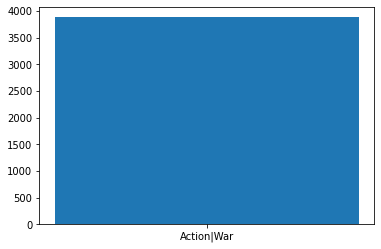

In [ ]:
query = "SELECT genres, COUNT(*) from movielens.data_movies;"
try:
  rows = session.execute(query)
except Exception as e:
  print(e)

genres = []
count = []
for row in rows:
    print(row)
    genres.append(row[0])
    count.append(row[1])

print(genres)
print(count)

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(genres, height=count)
plt.show()

In [ ]:
astr = 'Airplane! (1980)'
astr_rev = astr[::-1]
print(astr_rev)
first = astr_rev.index(')')
print(first)
last = astr_rev.index('(')
print(last)
year = astr_rev[first+1: last][::-1]
print(year)
movie = astr_rev[last+1:][::-1]
print(movie)


)0891( !enalpriA
0
5
1980
Airplane! 


* Visualize the bar plot showing no.of movies released in a particular year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


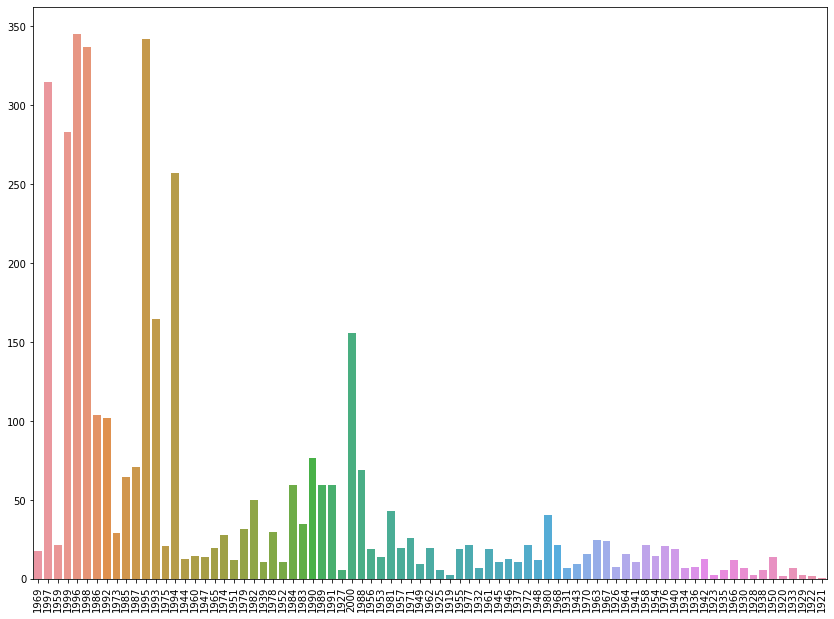

In [ ]:
query = "SELECT * from movielens.data_movies;"
try:
  rows = session.execute(query)
except Exception as e:
  print(e)

dic_movieid_name = {}
years = []
for row in rows:
    #print(row)
    data = row.title[::-1]
    first = data.index(')')
    last = data.index('(')
    year = data[first+1: last][::-1]
    name = data[last+1:][::-1]
    dic_movieid_name[row.movieid] = name
    years.append(year)

#print(movies)
#print(years)
from collections import Counter
movie_counter = dict(Counter(years))

import seaborn as sns

x = list(movie_counter.keys())
y = list(movie_counter.values())

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11.7, 8.7))
g = sns.barplot(x, y)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

* Depict the plot of Age groups ratio who are active in watching movies

In [ ]:
from collections import Counter

query = "SELECT * from movielens.data_ratings;"
try:
  rows = session.execute(query)
except Exception as e:
  print(e)

userids = []
for row in rows:
  userids.append(row[1])

user_movierating_count = dict(Counter(userids))

In [ ]:
query = "SELECT * from movielens.data_users;"
try:
  rows = session.execute(query)
except Exception as e:
  print(e)

dic_userid_ages = {}
for row in rows:
  dic_userid_ages[row[0]] = row[1]


In [ ]:
import seaborn as sns
from operator import itemgetter
from itertools import groupby

user_age_moviecount = {}
for userid, age in dic_userid_ages.items():

      if age not in user_age_moviecount:
        user_age_moviecount[age] = 0

      if userid in user_movierating_count:
        user_age_moviecount[age] = user_age_moviecount[age] + user_movierating_count[userid] #how many movies watched by this age

# sorted_input = sorted(user_age_moviecount.items(), key=itemgetter(0))
# groups = groupby(sorted_input, key=itemgetter(1))

# count_age = [{'Age':[x[0] for x in v], 'Count':k} for k, v in groups]

In [ ]:
print(user_age_moviecount)

{35: 0, 56: 573, 25: 1630, 1: 384, 45: 1076, 18: 0, 50: 0}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


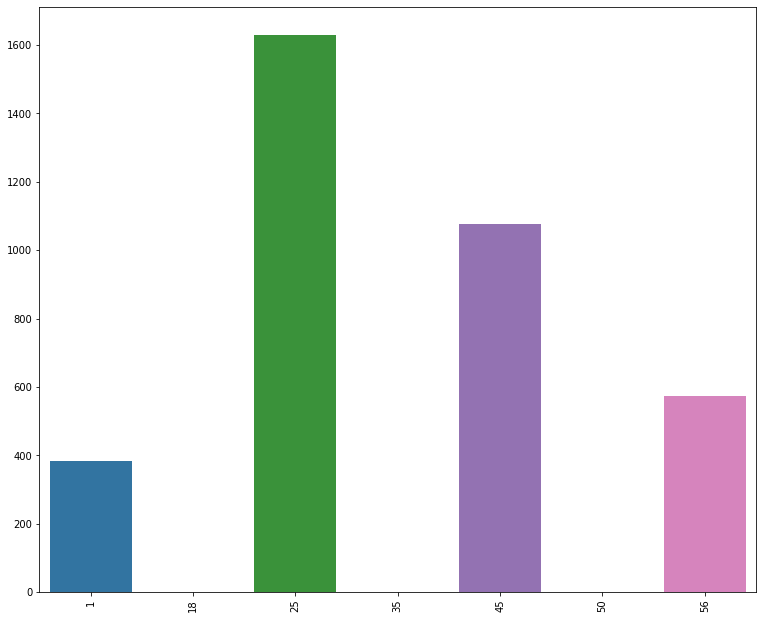

In [ ]:
x = list(user_age_moviecount.keys())
y = list(user_age_moviecount.values())

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10.7, 8.7))
g = sns.barplot(x, y)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

### Analyzing the Data (2 points)

Analyzing the correlation between the movies records, implement a function to recommend movies based on search term

* Retrieve all the data from ratings table

In [ ]:
query = "SELECT * from movielens.data_ratings;"
try:
  rows = session.execute(query)
except Exception as e:
  print(e)

dic_movie_ratings = {}
for row in rows:
  #Row(movieid=3372, rating=4, userid=4213)
  dic_movie_ratings[row.movieid] = row.rating

* Create a movie matrix by applying pivot table with the above retrieved ratings data

* use `pd.pivot_table` with index = `userid`, columns = `movieid` and Values = `rating`

 **Hint:** create a dataframe with above retrieved ratings data to apply pivot table

In [ ]:
# YOUR CODE HERE

* Define a function named `recommend_movies()` which will take a movieid as argument and return the top 5 similar movieid's

    * Considering the argument (movieid) as search item collect the particular row data
    
    * Using movie matrix calculate correlation between movie search Item data and all the remaining data
    
        * Hint: [corr_with()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corrwith.html)
        
    * Sort the result by ascending order and return the top 5 items

In [ ]:
def recommend_movie(movieId):
    # YOUR CODE HERE

SyntaxError: ignored

* write a query to get MovieId of a Title (your choice) and the result MovieId as a search item by calling the above defined function

In [ ]:
# YOUR CODE HERE

* Now taking the resulf of top 5 items (MovieId's) write a query to retrieve the Movie title from movies table

In [ ]:
# YOUR CODE HERE